# 1.6 Группировка и агрегация

In [2]:
import pandas as pd
import numpy as np

In [3]:
SP = pd.read_csv('StudentsPerformance.csv')

In [4]:
SP.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
SP.groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [7]:
SP.groupby('gender').agg({'math score':'mean','reading score':'mean'})

,math score,reading score
gender,,
female,63.633205,72.608108
male,68.728216,65.473029


In [9]:
SP.groupby('gender', as_index=False)\
        .agg({'math score':'mean','reading score':'mean'})\
        .rename(columns ={'math score':'mean_math score','reading score':'mean_reading score'})


,gender,mean_math score,mean_reading score
0,female,63.633205,72.608108
1,male,68.728216,65.473029


In [16]:
mean_scores1 = SP.groupby(['gender','race/ethnicity'], as_index=False)\
        .agg({'math score':'mean','reading score':'mean'})\
        .rename(columns ={'math score':'mean_math score','reading score':'mean_reading score'})
mean_scores1

,gender,race/ethnicity,mean_math score,mean_reading score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [17]:
mean_scores1.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [30]:
mean_scores = SP.groupby(['gender','race/ethnicity'])\
        .agg({'math score':'mean','reading score':'mean'})\
        .rename(columns ={'math score':'mean_math_score','reading score':'mean_reading_score'})
mean_scores

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [19]:
mean_scores.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [20]:
mean_scores.loc[('female', 'group A')]

mean_math score       58.527778
mean_reading score    69.000000
Name: (female, group A), dtype: float64

In [21]:
mean_scores.loc[[('female', 'group A'),('female', 'group B')]]

mean_math score  mean_reading score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923

In [22]:
SP['math score'].unique()

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  65,  78,
        50,  18,  46,  54,  66,  44,  74,  73,  67,  70,  62,  63,  56,
        97,  81,  75,  57,  55,  53,  59,  82,  77,  33,  52,   0,  79,
        39,  45,  60,  61,  41,  49,  30,  80,  42,  27,  43,  68,  85,
        98,  87,  51,  99,  84,  91,  83,  89,  22, 100,  96,  94,  48,
        35,  34,  86,  92,  37,  28,  24,  26,  95,  36,  29,  32,  93,
        19,  23,   8])

In [23]:
SP['math score'].nunique()

81

In [32]:
SP.sort_values(['gender','math score'],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


In [34]:
SP.sort_values(['gender','math score'],ascending=False)\
        .groupby('gender').head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [35]:
SP = SP.rename(columns=
              {'parental level of education': 'parental_level_of_education',
               'test preparation course': 'test_preparation_course',
               'math score': 'math_score',
               'reading score': 'reading_score',
               'writing score': 'writing_score'})

In [36]:
SP['total_score'] = SP.math_score + SP.reading_score + SP.writing_score

In [37]:
SP

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [38]:
SP = SP.assign(total_score_log = np.log(SP.total_score))

In [39]:
SP

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


In [40]:
# удаление
SP.drop(['total_score'], axis = 1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,5.384495
1,female,group C,some college,standard,completed,69,90,88,5.509388
2,female,group B,master's degree,standard,none,90,95,93,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,4.997212
4,male,group C,some college,standard,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,5.273000
998,female,group D,some college,standard,completed,68,78,77,5.407172


In [41]:
SP

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


# вопрос

## Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.
https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по Dota2.

https://api.opendota.com/api/heroes  https://www.opendota.com/

In [113]:
dota = pd.read_csv('dota_hero_stats.csv')
dota

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [51]:
dota.groupby('legs').describe()

Unnamed: 0                                                         id  \
          count       mean        std   min   25%   50%   75%    max count   
legs                                                                         
0          11.0  46.000000  32.227318   9.0  20.0  38.0  76.0   92.0  11.0   
2          95.0  58.789474  34.307091   0.0  29.5  58.0  86.5  116.0  95.0   
4           7.0  61.714286  31.721256   2.0  53.0  61.0  84.0   95.0   7.0   
6           3.0  68.000000  46.679760  15.0  50.5  86.0  94.5  103.0   3.0   
8           1.0  59.000000        NaN  59.0  59.0  59.0  59.0   59.0   1.0   

                                                           
           mean        std   min   25%   50%   75%    max  
legs                                                       
0     47.727273  32.554849  10.0  21.5  40.0  78.0   94.0  
2     60.842105  34.994928   1.0  31.5  60.0  88.5  129.0  
4     63.571429  32.035694   3.0  55.0  63.0  86.0   97.0  
6     69.666667  47.247575  16.0  52.0  88.0  96.5  105.0  
8     61.000000        NaN  61.0  61.0  61.0  61.0   61.0

In [52]:
dota.groupby('legs').agg({'legs': 'count'})

,legs
legs,
0,11
2,95
4,7
6,3
8,1


In [54]:
dota.groupby('legs').size()

legs
0    11
2    95
4     7
6     3
8     1
dtype: int64

In [56]:
dota.value_counts('legs')

legs
2    95
0    11
4     7
6     3
8     1
dtype: int64

In [60]:
dota['legs'].value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [61]:
dota.legs.value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

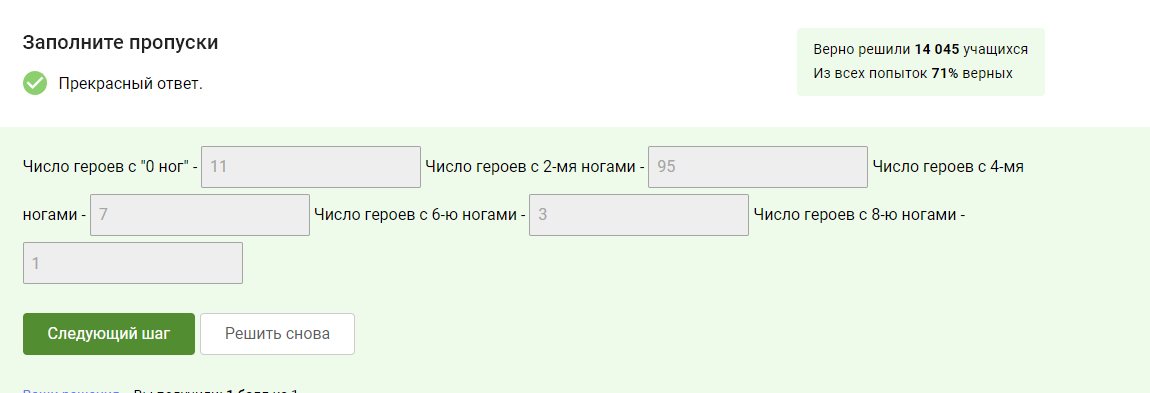

# вопрос

К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! 

https://stepik.org/media/attachments/course/4852/accountancy.csv

Посмотрите у кого из них больше средний заработок в различных категориях (
колонка Type) и заполните таблицу, 

указывая исполнителя с большим заработком в каждой из категорий.

In [62]:
accountancy = pd.read_csv('accountancy.csv')

In [63]:
accountancy.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


In [64]:
accountancy.describe()

,Unnamed: 0,Salary
count,50.00000,50.000000
mean,24.50000,145.140000
std,14.57738,61.373733
min,0.00000,50.000000
25%,12.25000,85.250000
50%,24.50000,146.000000
75%,36.75000,192.250000
max,49.00000,249.000000


In [72]:
accountancy = accountancy.drop('Unnamed: 0', axis=1)

In [76]:
accountancy.groupby(['Type','Executor']).describe()

Salary                                                       \
               count        mean        std    min     25%    50%     75%   
Type Executor                                                               
A    Loopa       1.0   58.000000        NaN   58.0   58.00   58.0   58.00   
     Pupa        6.0  160.833333  67.008706   55.0  125.75  172.0  209.25   
B    Loopa       6.0  145.166667  76.851589   50.0   83.75  156.5  188.75   
     Pupa        1.0   77.000000        NaN   77.0   77.00   77.0   77.00   
C    Loopa       6.0  154.333333  76.810590   54.0   97.00  160.0  210.25   
     Pupa        2.0   74.500000  27.577164   55.0   64.75   74.5   84.25   
D    Loopa       7.0  137.714286  35.761778   78.0  119.00  146.0  160.50   
     Pupa        4.0  146.500000  59.769000   63.0  123.75  164.5  187.25   
E    Loopa       6.0  164.000000  54.680892   83.0  130.50  170.0  210.25   
     Pupa        5.0  131.200000  60.334070   65.0   92.00  109.0  193.00   
F    Loopa       2.0  238.000000   8.485281  232.0  235.00  238.0  241.00   
     Pupa        4.0  136.250000  55.053762   62.0  122.00  144.0  158.25   

                      
                 max  
Type Executor         
A    Loopa      58.0  
     Pupa      234.0  
B    Loopa     249.0  
     Pupa       77.0  
C    Loopa     249.0  
     Pupa       94.0  
D    Loopa     181.0  
     Pupa      194.0  
E    Loopa     220.0  
     Pupa      197.0  
F    Loopa     244.0  
     Pupa      195.0

In [77]:
accountancy.groupby(['Type','Executor']).agg({'Salary':'mean'})

Salary
Type Executor            
A    Loopa      58.000000
     Pupa      160.833333
B    Loopa     145.166667
     Pupa       77.000000
C    Loopa     154.333333
     Pupa       74.500000
D    Loopa     137.714286
     Pupa      146.500000
E    Loopa     164.000000
     Pupa      131.200000
F    Loopa     238.000000
     Pupa      136.250000

In [93]:
accountancy.groupby(['Type','Executor'],as_index=False).agg({'Salary':'mean'}).sort_values(['Type'], ascending=False)

,Type,Executor,Salary
10,F,Loopa,238.000000
11,F,Pupa,136.250000
8,E,Loopa,164.000000
9,E,Pupa,131.200000
6,D,Loopa,137.714286
7,D,Pupa,146.500000
4,C,Loopa,154.333333
5,C,Pupa,74.500000
2,B,Loopa,145.166667
3,B,Pupa,77.000000


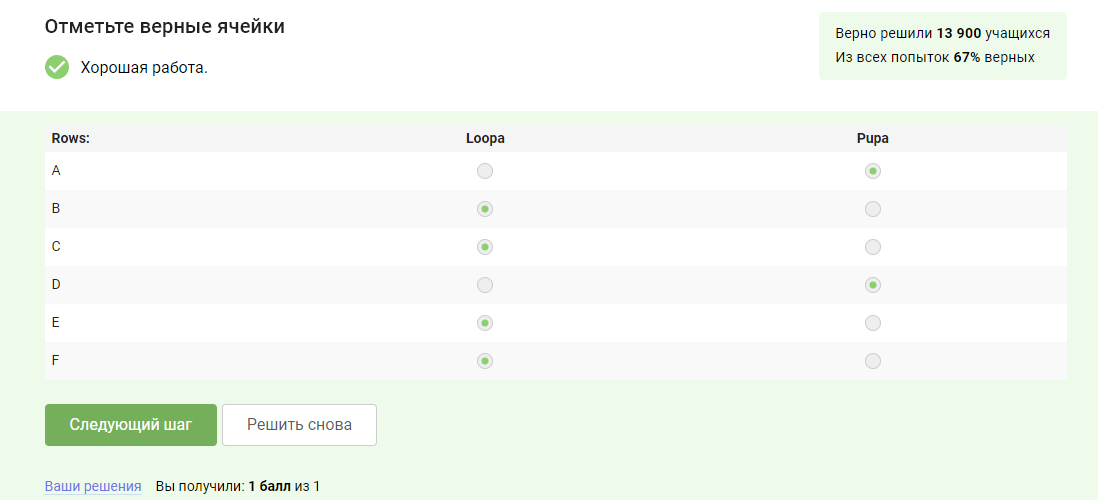

In [88]:
# чужое 
accountancy.groupby(['Type','Executor'],as_index=False)['Salary'].mean().sort_values(['Type','Executor','Salary'])

,Type,Executor,Salary
0,A,Loopa,58.000000
1,A,Pupa,160.833333
2,B,Loopa,145.166667
3,B,Pupa,77.000000
4,C,Loopa,154.333333
5,C,Pupa,74.500000
6,D,Loopa,137.714286
7,D,Pupa,146.500000
8,E,Loopa,164.000000
9,E,Pupa,131.200000


In [89]:
accountancy.groupby(['Type','Executor']).Salary.mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

In [91]:
accountancy.groupby(['Executor', 'Type']).mean().Salary['Loopa'].index

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object', name='Type')

In [92]:
accountancy.groupby(['Executor', 'Type']).mean().Salary['Loopa']

Type
A     58.000000
B    145.166667
C    154.333333
D    137.714286
E    164.000000
F    238.000000
Name: Salary, dtype: float64

In [90]:
for i in (accountancy.groupby(['Executor', 'Type']).mean().Salary['Loopa'].index):
    if accountancy.groupby(['Executor', 'Type']).mean().Salary['Loopa'][i] > accountancy.groupby(['Executor', 'Type']).mean().Salary['Pupa'][i]:
        print(i, 'Loopa')
    else:
        print(i, 'Pupa')

A Pupa
B Loopa
C Loopa
D Pupa
E Loopa
F Loopa


# вопрос

##### Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.

In [97]:
dota

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"
...,...,...,...,...,...,...,...,...
112,112,Melee,114,2,Monkey King,npc_dota_hero_monkey_king,agi,"['Carry', 'Escape', 'Disabler', 'Initiator']"
113,113,Ranged,119,2,Dark Willow,npc_dota_hero_dark_willow,int,"['Support', 'Nuker', 'Disabler', 'Escape']"
114,114,Melee,120,2,Pangolier,npc_dota_hero_pangolier,agi,"['Carry', 'Nuker', 'Disabler', 'Durable', 'Esc..."
115,115,Ranged,121,2,Grimstroke,npc_dota_hero_grimstroke,int,"['Support', 'Nuker', 'Disabler', 'Escape']"


In [114]:
dota = dota.drop('Unnamed: 0', axis=1)

In [122]:
dota.groupby(['attack_type','primary_attr']).describe()

id                                           \
                         count       mean        std   min    25%   50%   
attack_type primary_attr                                                  
Melee       agi           19.0  63.315789  38.874517   1.0  36.50  67.0   
            int            2.0  69.500000  20.506097  55.0  62.25  69.5   
            str           35.0  64.771429  35.110821   2.0  33.50  71.0   
Ranged      agi           18.0  47.777778  33.119313   6.0  16.25  46.5   
            int           40.0  57.275000  33.055499   3.0  30.75  52.5   
            str            3.0  86.666667  25.774665  59.0  75.00  91.0   

                                         legs                                \
                             75%    max count      mean       std  min  25%   
attack_type primary_attr                                                      
Melee       agi            91.00  120.0  19.0  2.315789  1.796683  0.0  2.0   
            int            76.75   84.0   2.0  2.000000  0.000000  2.0  2.0   
            str            97.50  129.0  35.0  2.171429  0.890661  0.0  2.0   
Ranged      agi            69.75  113.0  18.0  1.444444  1.149026  0.0  0.0   
            int            80.75  121.0  40.0  2.250000  0.926809  0.0  2.0   
            str           100.50  110.0   3.0  1.333333  1.154701  0.0  1.0   

                                         
                          50%  75%  max  
attack_type primary_attr                 
Melee       agi           2.0  2.0  8.0  
            int           2.0  2.0  2.0  
            str           2.0  2.0  6.0  
Ranged      agi           2.0  2.0  4.0  
            int           2.0  2.0  6.0  
            str           2.0  2.0  2.0

In [123]:
dota[['attack_type', 'primary_attr']].describe()

,attack_type,primary_attr
count,117,117
unique,2,3
top,Ranged,int
freq,61,42


In [115]:
dota.groupby(['attack_type','primary_attr']).count()

id  legs  localized_name  name  roles
attack_type primary_attr                                       
Melee       agi           19    19              19    19     19
            int            2     2               2     2      2
            str           35    35              35    35     35
Ranged      agi           18    18              18    18     18
            int           40    40              40    40     40
            str            3     3               3     3      3

In [118]:
dota.groupby(['attack_type','primary_attr']).count().idxmax()[0]

('Ranged', 'int')

In [110]:
dota.groupby(['attack_type','primary_attr']).size()

attack_type  primary_attr
Melee        agi             19
             int              2
             str             35
Ranged       agi             18
             int             40
             str              3
dtype: int64

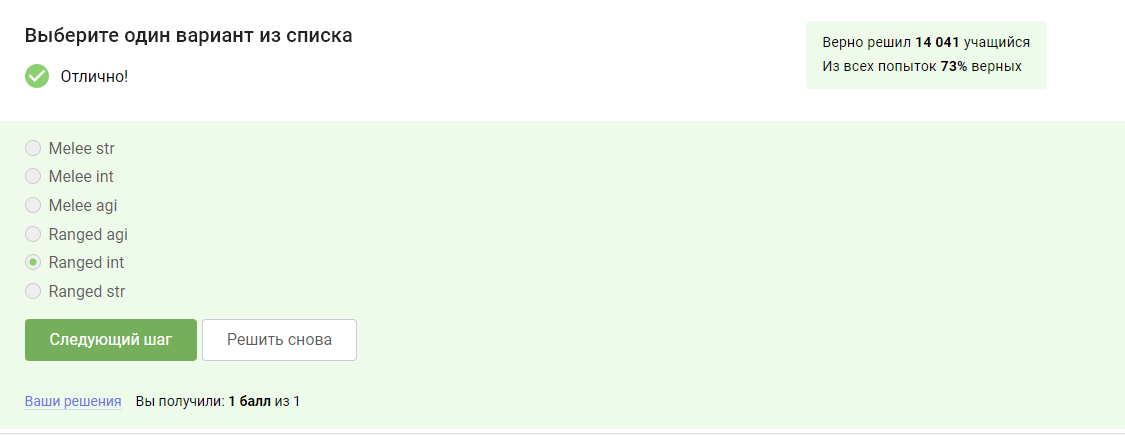

In [111]:
# чужое
dota.groupby(['attack_type', 'primary_attr'], as_index = False)\
    .aggregate(cnt_heroes = ('localized_name', 'count')).sort_values('cnt_heroes', ascending = False)

,attack_type,primary_attr,cnt_heroes
4,Ranged,int,40
2,Melee,str,35
0,Melee,agi,19
3,Ranged,agi,18
5,Ranged,str,3
1,Melee,int,2


In [119]:
dota.groupby(['attack_type', 'primary_attr']).agg('count').idxmax()[0]

('Ranged', 'int')

In [120]:
dota[['attack_type', 'primary_attr']].describe().loc['top']

attack_type     Ranged
primary_attr       int
Name: top, dtype: object

# вопрос

## Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. 

В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.

http://stepik.org/media/attachments/course/4852/algae.csv

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной 

mean_concentrations.

Модуль pandas уже импортирован.

In [127]:
concentrations = pd.read_csv('algae.csv')

In [128]:
concentrations

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [130]:
mean_concentrations = concentrations.groupby('genus').describe()
mean_concentrations

sucrose                                                    \
              count      mean       std       min       25%       50%   
genus                                                                   
Ascophyllum     1.0  6.825467       NaN  6.825467  6.825467  6.825467   
Cladophora      3.0  4.008792  1.634817  2.452623  3.157047  3.861470   
Fucus           3.0  4.355112  2.110570  3.001472  3.139171  3.276870   
Palmaria        1.0  0.704580       NaN  0.704580  0.704580  0.704580   
Saccharina      2.0  4.183596  3.602672  1.636122  2.909859  4.183596   

                                alanin            ...   glucose            \
                  75%       max  count      mean  ...       75%       max   
genus                                             ...                       
Ascophyllum  6.825467  6.825467    1.0  0.875429  ...  3.414961  3.414961   
Cladophora   4.786877  5.712284    3.0  3.997055  ...  3.041936  3.343707   
Fucus        5.031933  6.786996    3.0  3.566411  ...  3.085842  3.623225   
Palmaria     0.704580  0.704580    1.0  3.176440  ...  3.242090  3.242090   
Saccharina   5.457333  6.731070    2.0  3.524207  ...  5.496907  6.013219   

            oleic_acid                                                    \
                 count      mean       std       min       25%       50%   
genus                                                                      
Ascophyllum        1.0  2.432526       NaN  2.432526  2.432526  2.432526   
Cladophora         3.0  2.263472  0.735111  1.432514  1.980700  2.528886   
Fucus              3.0  3.367647  3.050376  0.304573  1.848888  3.393203   
Palmaria           1.0  2.245538       NaN  2.245538  2.245538  2.245538   
Saccharina         2.0  4.487252  0.467471  4.156700  4.321976  4.487252   

                                 
                  75%       max  
genus                            
Ascophyllum  2.432526  2.432526  
Cladophora   2.678951  2.829016  
Fucus        4.899184  6.405165  
Palmaria     2.245538  2.245538  
Saccharina   4.652528  4.817804  

[5 rows x 40 columns]

In [132]:
mean_concentrations = concentrations.groupby('genus').mean()

In [133]:
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


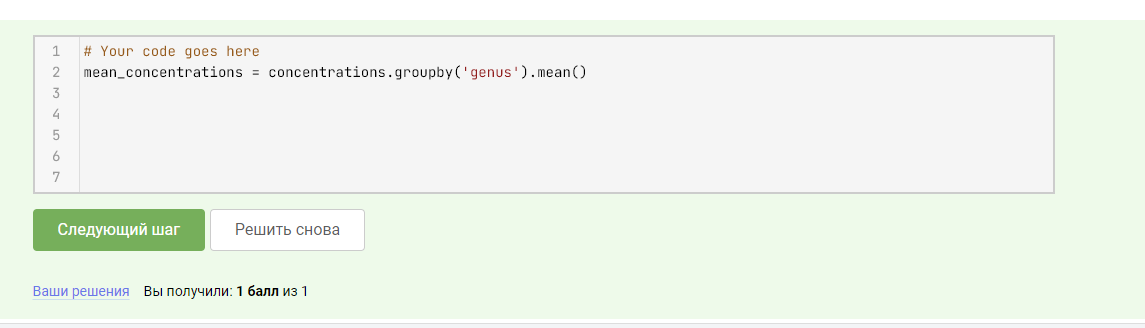

# вопрос

##### Пользуясь предыдущими данными, укажите через пробел (без запятых) 

чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. 

Округлите до 2-ого знака, десятичным разделителем является точка.

Формат ответа:
0.55 6.77 7.48

In [134]:
concentrations

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [158]:
concentrations.query("genus =='Fucus'").alanin

0    3.711498
2    0.346431
3    6.641303
Name: alanin, dtype: float64

In [161]:
concentrations.query("genus =='Fucus'").alanin.describe().round(2)

count    3.00
mean     3.57
std      3.15
min      0.35
25%      2.03
50%      3.71
75%      5.18
max      6.64
Name: alanin, dtype: float64

In [162]:
concentrations.query("genus =='Fucus'").alanin.agg({'mean','min','max'}).round(2)

mean    3.57
min     0.35
max     6.64
Name: alanin, dtype: float64

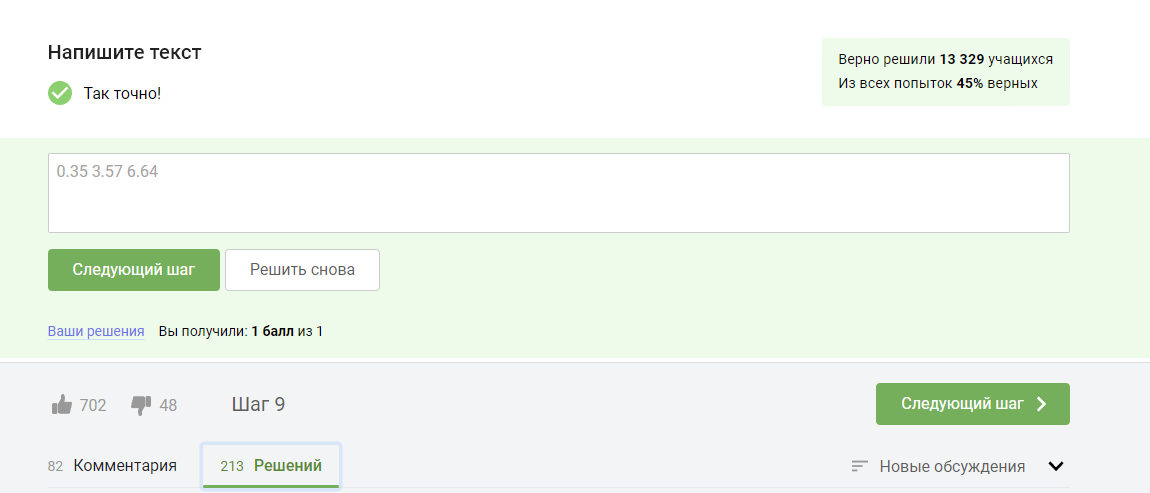

In [164]:
concentrations.query("genus =='Fucus'").alanin.agg({'min','mean','max'}).to_frame

<bound method Series.to_frame of mean    3.566411
min     0.346431
max     6.641303
Name: alanin, dtype: float64>

In [171]:
concentrations.query('genus == "Fucus"') \
   .alanin.agg([np.min, np.mean, np.max]) \
   .round(2).to_list()

[0.35, 3.57, 6.64]

In [172]:
print(*concentrations.loc[concentrations['genus'] == 'Fucus', 'alanin']\
      .describe().loc[['min', 'mean', 'max']].round(2).to_list())

0.35 3.57 6.64


# вопрос

#### Сгруппируйте данные по переменной group и соотнесите вопросы с ответами

http://stepik.org/media/attachments/course/4852/algae.csv

In [173]:
concentrations

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [178]:
concentrations.groupby('group').describe()

sucrose                                                             \
        count      mean       std       min       25%      50%       75%   
group                                                                      
brown     6.0  4.709666  2.336471  1.636122  3.070321  5.00397  6.773014   
green     3.0  4.008792  1.634817  2.452623  3.157047  3.86147  4.786877   
red       1.0  0.704580       NaN  0.704580  0.704580  0.70458  0.704580   

                alanin            ...   glucose           oleic_acid  \
            max  count      mean  ...       75%       max      count   
group                             ...                                  
brown  6.825467    6.0  3.103846  ...  3.866782  6.013219        6.0   
green  5.712284    3.0  3.997055  ...  3.041936  3.343707        3.0   
red    0.704580    1.0  3.176440  ...  3.242090  3.242090        1.0   

                                                                             
           mean       std       min       25%       50%       75%       max  
group                                                                        
brown  3.584995  2.094095  0.304573  2.672695  3.774952  4.652528  6.405165  
green  2.263472  0.735111  1.432514  1.980700  2.528886  2.678951  2.829016  
red    2.245538       NaN  2.245538  2.245538  2.245538  2.245538  2.245538  

[3 rows x 40 columns]

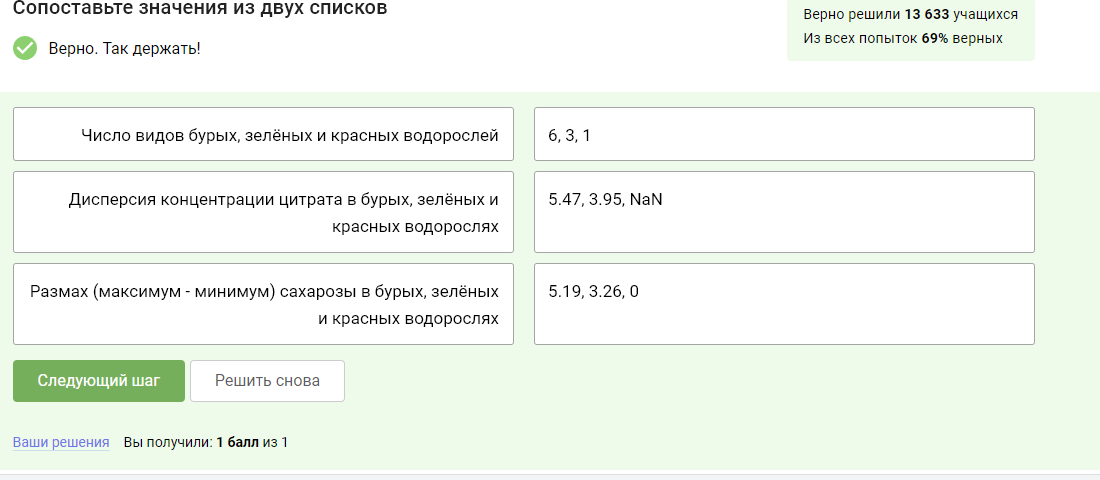

In [179]:
concentrations.groupby('group').agg({np.var,np.ptp, 'count'})

sucrose                     alanin                     citrate  \
        count       ptp       var  count       ptp       var   count   
group                                                                  
brown       6  5.189345  5.459098      6  6.294872  7.220351       6   
green       3  3.259662  2.672626      3  5.232574  7.059917       3   
red         1  0.000000       NaN      1  0.000000       NaN       1   

                          glucose                     oleic_acid            \
            ptp       var   count       ptp       var      count       ptp   
group                                                                        
brown  5.351686  5.468942       6  3.740495  1.767756          6  6.100592   
green  3.857763  3.950113       3  1.026753  0.266265          3  1.396502   
red    0.000000       NaN       1  0.000000       NaN          1  0.000000   

                 
            var  
group            
brown  4.385233  
green  0.540388  
red         NaN

In [180]:
concentrations.groupby('group').agg({np.var,np.ptp, 'count'}).round(2)

sucrose             alanin             citrate             glucose  \
        count   ptp   var  count   ptp   var   count   ptp   var   count   
group                                                                      
brown       6  5.19  5.46      6  6.29  7.22       6  5.35  5.47       6   
green       3  3.26  2.67      3  5.23  7.06       3  3.86  3.95       3   
red         1  0.00   NaN      1  0.00   NaN       1  0.00   NaN       1   

                  oleic_acid             
        ptp   var      count  ptp   var  
group                                    
brown  3.74  1.77          6  6.1  4.39  
green  1.03  0.27          3  1.4  0.54  
red    0.00   NaN          1  0.0   NaN

In [182]:
concentrations.groupby('group').citrate.var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

In [183]:
concentrations.groupby('group').species.count()

group
brown    6
green    3
red      1
Name: species, dtype: int64

In [184]:
concentrations.groupby('group').sucrose.agg(lambda x: max(x) - min(x))

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64